<h1><center><bold>
Atelier 6: Systèmes de Recherche d'Images par le Contenu CBIR</bold>

</center></h1>


Table des matières
<ul>
1	Introduction </br>
2	Base d’images</br>
3	Implémentation</br>

> 3.1	Lecture des images</br>
3.2	Recherche par image entière</br>
3.3	Recherche par Couleur</br>
3.4	Recherche par Histogramme</br>
3.5	Recherche par texture</br>
3.6	Robustesse vis-à-vis des transformations géométriques</br>

4	Conclusion</br>


---
<h2>1	Introduction</h2>

L’objectif de cet atelier est de vous initier aux systèmes de recherche basée sur le contenu visuel (CBIR, Content-Based Image Retrieval). Le CBIR permet de rechercher des images similaires à une image requête dans une base constituée d’images. Cette similarité n'est pas calculée sur les images elles-mêmes, mais par le biais d’une descripteur choisi par celui qui a conçu le système. La figure ci-dessous présente une vue globale d’un système CBIR.



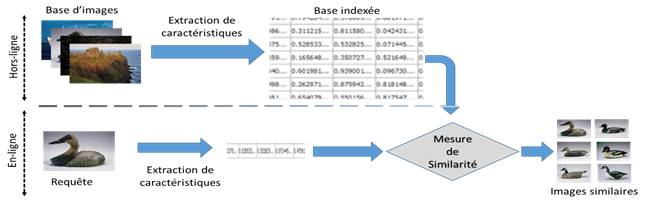

Un système CBIR est organisé en deux phases :


1.   Phase hors ligne, souvent appelée indexation, au cours de laquelle un vecteur descripteur est extrait pour chaque image et enregistré sous forme de base d'index.
2.   Phase en ligne, souvent appelée recherche, au cours de laquelle le système recherche les images similaires à une image requête. Le même type de descripteur est extrait de l'image requête et comparé à la base d'index.

<br>
Deux paramètres sont à prendre en considération lors de l’élaboration d’un système CBIR : les descripteurs (également appelés caractéristiques) à utiliser pour constituer la base d'index, et la mesure de similarité à utiliser pour rechercher les images les plus similaires à une image requête. Ainsi, la recherche se fait en mesurant la distance entre les descripteurs plutôt qu'entre les images.
<br>
<br>
Les descripteurs utilisés pour constituer la base d'index sont généralement des descripteurs de bas niveau, tels que : la forme, la couleur et la texture. La mesure de similarité utilisée peut être une simple distance euclidienne.

<h2>2	Base d’images</h2>
Pour cet atelier, nous allons utiliser une partie de la base d’images COREL. La base COREL contient 10 800 images classées en 80 groupes d’images. Cette base est parfaite pour comprendre les fondamentaux du CBIR. Ici, nous allons utiliser seulement 270 images appartenant à deux groupes d’images et qui sont regroupées dans un seul dossier.<br>
Le lien vers la base d'images est le suivant : https://drive.google.com/drive/folders/1_k42mYdBMdQVd8bx_A3c89mJxcTKELqT?usp=drive_link <br>
<br>
Téléchargez la base sur votre Google Drive.
Le chemin du dossier sur votre drive doit être:
"My Drive/CBIR_DataSet/obj_decoys/"

<h2>3	Implémentation</h2>

Pour la première étape, qui est l'indexation, le premier code à écrire consiste à parcourir toutes les images de la base de données afin d'extraire de chacune un vecteur descripteur approprié.

<h2>3.1	Lecture des images</h2>
1. Lire toutes les images de la base et afficher 6 images aléatoirement.<br>
2. Lire les deux images requête  qui se trouvent dans le dossier My Drive/CBIR_DataSet/img_requetes/

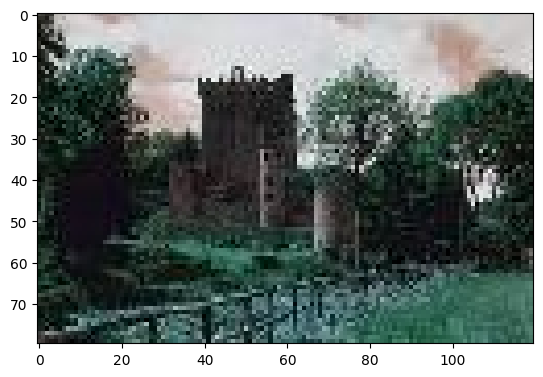

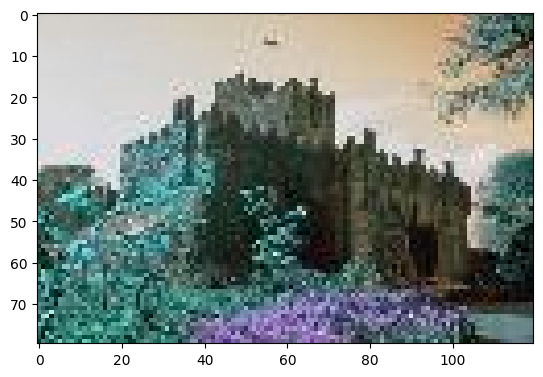

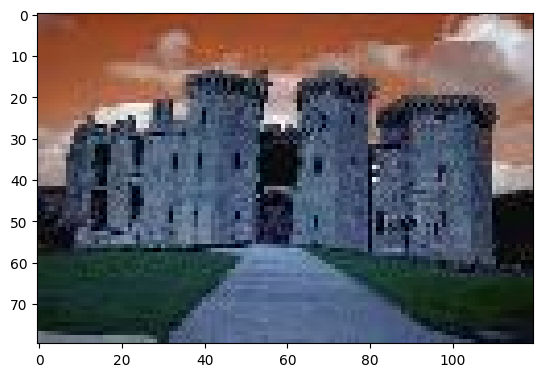

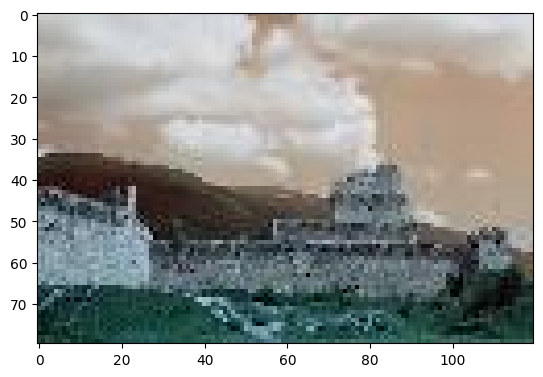

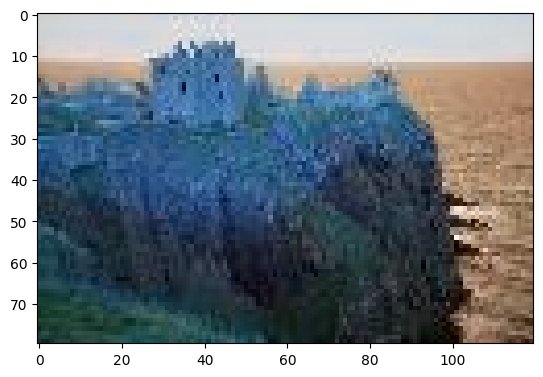

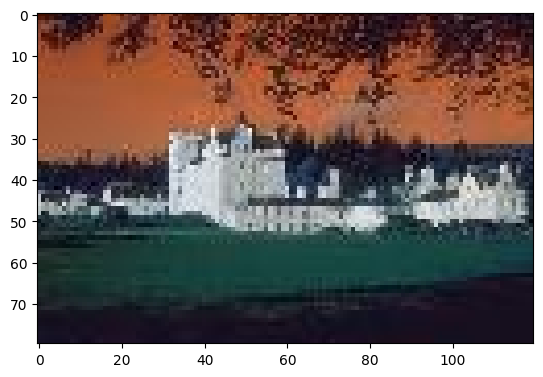

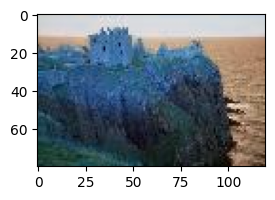

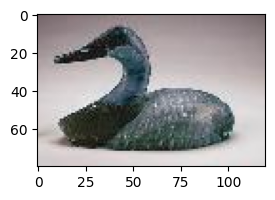

In [4]:
import random
import os
import cv2
import matplotlib.pyplot as plt
Data_path="/content/drive/MyDrive/Colab Notebooks/lab6/obj_decoys-20241007T125454Z-001/obj_decoys"
img_list=os.listdir(Data_path)
s= 0
for img in img_list:
  im=Data_path+"/"+img
  image=cv2.imread((im))
  if random.choice([0, 1])==1:
    #plt.subplot(2, 3, )
    plt.imshow(image)
    plt.show()
    s+=1
  if s==6:
    break
req_path="/content/drive/MyDrive/Colab Notebooks/lab6/img_requetes-20241007T125442Z-001/img_requetes"
j=1
for req in os.listdir(req_path):
  im=req_path+"/"+req
  image=cv2.imread((im))
  plt.figure(figsize=(10,5))
  plt.subplot(2,3,j+1)
  plt.imshow(image)
  j+=1
plt.show()


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h2>3.2	Recherche par image entière</h2>
Pour une première implémentation d’un système CBIR, l’objectif est d’afficher les 5 images les plus similaires à l’image requête « ImageRequete.jpg » en se basant sur un calcul de différence entre images entières.<br>
<br>
1. Utiliser la distance enclidienne entre l'image requête et toutes les images de la base. Les distances seront enregistrées dans un dictionnaire et seront par la suite triées par ordre croissant.<br>
2. Afficher l'image requête ainsi que les 5 images les plus similaires en termes de distance euclidienne. Interpréter les résultats.

<ipython-input-6-2fdac3cb2127>:16: RuntimeWarning: overflow encountered in scalar subtract
  distance+=((image[xi,yi,ci]-img_req[xi,yi,ci])**2)


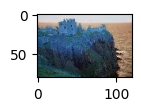

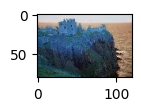

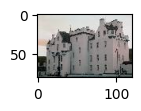

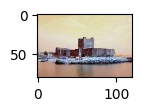

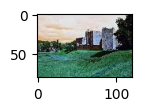

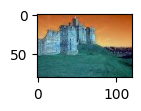

In [6]:
from re import I
import numpy as np
img_list=os.listdir(Data_path)
Data_path="/content/drive/MyDrive/Colab Notebooks/lab6/obj_decoys-20241007T125454Z-001/obj_decoys"
img_req=cv2.imread("/content/drive/MyDrive/Colab Notebooks/lab6/img_requetes-20241007T125442Z-001/img_requetes/ImageRequete.jpg")
l0,h0,c0=np.shape(img_req)
distances={}
for img in img_list:
  im=Data_path+"/"+img
  image=cv2.imread((im))
  l,h,c=np.shape(image)
  distance=0
  for ci in range(c):
    for yi in range(h):
      for xi in range(l):
        distance+=((image[xi,yi,ci]-img_req[xi,yi,ci])**2)
  distance=np.sqrt(distance)
  distances[img]=distance
plt.figure(figsize=(10,10))
plt.subplot(1,7,1)
plt.imshow(img_req)
i=2
for key in sorted(distances, key=distances.get)[:5]:
  im=Data_path+"/"+key
  image=cv2.imread((im))
  plt.figure(figsize=(10,10))
  plt.subplot(1,7,i)
  plt.imshow(image)
  i+=1
  if i==7:
    break
plt.show()


<h2>3.3	Recherche par Couleur</h2>
Dans cette partie, la caractéristique couleur sera utilisée pour développer notre système CBIR. La recherche est effectuée par similarité entre les caractéristiques de l’image requête et celles de la base d’index.  Le vecteur descripteur couleur à utiliser est constitué des valeurs des moments statistiques : moyenne et variance de chaque composante couleur R, G et B. La taille du vecteur sera donc de 6.
<br>
<br>
Le code doit permettre d'abord d’indexer la base d’images et ensuite de lancer la recherche pour une image requête et d’afficher les 5 images les plus similaires.<br>
Le code contiendra 2 parties : <br>
1. La partie d'indexation : la fonction « CBIR_Indexation » est appelée avec comme paramètre la taille du vecteur descripteur. Cette partie ne doit être exécutée qu'une seule fois.<br>
2. La partie de recherche : la fonction « CBIR_Recherche » est appelée avec comme paramètres l'image requête, la matrice des descripteurs et les noms des images correspondantes.<br>
<br>
Le vecteur descripteur est créé par la fonction « getFeatures », qui prend en argument l'image et la taille du vecteur. C'est cette fonction que nous allons modifier pour ajouter d'autres descripteurs par la suite. Cette fonction appelle ici la fonction « color_Moments » qui retourne les 6 moments de couleur.


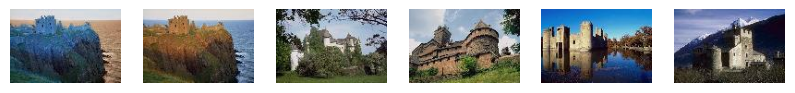

In [34]:
# le système CBIR est constituée de 2 étapes; Indexation et Recherche
# On va créer une fonction pour l'indexation d'une image
# C'est l'équivalent d'extraire une vecteur descripteur en se basant sur les moments statistiques des couleurs
from numpy import linalg

import numpy as np
def color_Moments(img):
  image=cv2.imread((img))
  l,h,c=np.shape(image)
  r=image[:,:,0]
  g=image[:,:,1]
  b=image[:,:,2]
  mean_red=np.mean(r)
  mean_green=np.mean(g)
  mean_blue=np.mean(b)
  variance_red=np.var(r)
  variace_green=np.var(g)
  variace_blue=np.var(b)
  return [mean_red,mean_green,mean_blue,variance_red,variace_green,variace_blue]
def getFeatures(img, fsize=6):
    return color_Moments(img)

def CBIR_Indexation(Data_path,fsize):
  images=os.listdir(Data_path)
  l=len(images)
  Matrix_Moments=np.empty((l,fsize+1),dtype=object)
  i=0
  for image in images:
    img=Data_path+"/"+image
    moments=getFeatures(img)
    Matrix_Moments[i,1:fsize+1]=moments
    Matrix_Moments[i,0]=image
    i+=1
  return Matrix_Moments

def CBIR_Recherche(Imreq,ind_Matrix):
  req_features = getFeatures(Imreq)
  l,c=np.shape(ind_Matrix)
  features= ind_Matrix[:,1:c]
  images=ind_Matrix[:,0]
  distance_dic={}
  for i in range(l):
    distance=np.linalg.norm(req_features-features[i,:])
    distance_dic[distance]=images[i]
    sorted_distances = sorted(distance_dic.items())  # Sort in ascending order
    closest_images = sorted_distances[:5]  # Get the top 5 closest images  for i in distance_dic.keys():
  j=2
  img_reqq=cv2.imread(Imreq)
  plt.figure(figsize=(10,10))
  plt.subplot(1,6,1)
  plt.imshow(img_reqq)
  plt.axis('off')
  for distance, img_name in closest_images:
      img_path = os.path.join(Data_path, img_name)
      img = cv2.imread(img_path)
      img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      plt.subplot(1,6,j)
      plt.imshow(img_rgb)
      plt.axis('off')
      j+=1
  plt.show()
req_path="/content/drive/MyDrive/Colab Notebooks/lab6/img_requetes-20241007T125442Z-001/img_requetes/ImageRequete.jpg"
Data_path="/content/drive/MyDrive/Colab Notebooks/lab6/obj_decoys-20241007T125454Z-001/obj_decoys"
matrix=CBIR_Indexation(Data_path,6)
CBIR_Recherche(req_path,matrix)
#imh=cv2.imread("/content/drive/MyDrive/Colab Notebooks/lab6/obj_decoys-20241007T125454Z-001/obj_decoys/Image0001.jpg")
#l=color_Moments(imh)
#print(l)



Afficher l'image requéte ainsi que les 5 images les plus similaires en termes de moments de couleur. Interpréter les résultats

<h2>3.4	Recherche par Histogramme</h2>
"L’histogramme est souvent utilisé pour regrouper le nombre de pixels par intensité. L’histogramme peut être élaboré dans n’importe quel espace couleur : RGB, HSV, … et même en niveaux de gris. Des études ont montré que l’espace de couleur HSV est le plus adapté à ce type de système de recherche. L’histogramme est un vecteur dont la taille est égale au nombre de valeurs d’intensité dans l’image. Pour l’utiliser comme vecteur descripteur, l’idée est de quantifier l’histogramme en un nombre limité de caractéristiques afin de réduire la taille du descripteur.<br>
<br>
1. Modifier le code pour permettre d’avoir un système CBIR utilisant un vecteur descripteur composé des caractéristiques de couleur et d’histogramme. Il faut écrire une fonction « hsvHistogramFeatures » qui prend comme argument une image et qui retourne le vecteur descripteur créé à partir de l’histogramme. La fonction « getFeatures » doit être modifiée pour concaténer les deux vecteurs descripteurs de moments et d’histogramme.<br>
2. Relancer l'indexation avec en plus des moments de couleur, le descripteur à base d'histogramme. Lancer la recherche par le nouveau descripteur. Comparer les résultats de cette recherche avec la recherche utilisant seulement la caractéristique couleur.




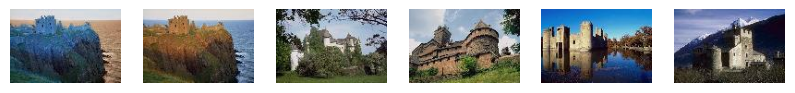

In [43]:
def color_Moments(img):
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    l, h, c = np.shape(image)
    r = image[:, :, 0]
    g = image[:, :, 1]
    b = image[:, :, 2]
    mean_red = np.mean(r)
    mean_green = np.mean(g)
    mean_blue = np.mean(b)
    variance_red = np.var(r)
    variance_green = np.var(g)
    variance_blue = np.var(b)
    return [mean_red, mean_green, mean_blue, variance_red, variance_green, variance_blue]

def hsvHistogramFeatures(img, num_bins=8):
    image = cv2.imread(img)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h_hist = cv2.calcHist([hsv_image], [0], None, [num_bins], [0, 180])  # Hue histogram
    s_hist = cv2.calcHist([hsv_image], [1], None, [num_bins], [0, 256])  # Saturation histogram
    v_hist = cv2.calcHist([hsv_image], [2], None, [num_bins], [0, 256])  # Value histogram
    h_hist = cv2.normalize(h_hist, h_hist).flatten()
    s_hist = cv2.normalize(s_hist, s_hist).flatten()
    v_hist = cv2.normalize(v_hist, v_hist).flatten()
    return np.concatenate((h_hist, s_hist, v_hist))

def getFeatures(img):
    color_moments = color_Moments(img)
    histogram_features = hsvHistogramFeatures(img)
    return np.concatenate((color_moments, histogram_features))

def CBIR_Indexation(Data_path):
    images = os.listdir(Data_path)
    l = len(images)
    Matrix_Moments = np.empty((l, 30 + 1), dtype=object)  # 30 for features + 1 for image name
    i = 0
    for image in images:
        img = os.path.join(Data_path, image)
        moments = getFeatures(img)
        Matrix_Moments[i, 1:] = moments
        Matrix_Moments[i, 0] = image
        i += 1
    return Matrix_Moments

def CBIR_Recherche(Imreq, ind_Matrix, Data_path):
    req_features = getFeatures(Imreq)
    l, c = np.shape(ind_Matrix)
    features = ind_Matrix[:, 1:c]
    images = ind_Matrix[:, 0]
    distance_dic = {}

    for i in range(l):
        distance = np.linalg.norm(req_features - features[i, :])
        distance_dic[distance] = images[i]
    j=2
    img_reqq=cv2.imread(Imreq)
    plt.figure(figsize=(10,10))
    plt.subplot(1,6,1)
    plt.imshow(img_reqq)
    plt.axis('off')
    sorted_distances = sorted(distance_dic.items())
    closest_images = sorted_distances[:5]

    for distance, img_name in closest_images:
        img_path = os.path.join(Data_path, img_name)
        img = cv2.imread(img_path)

        if img is not None:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(1,6,j)
            plt.imshow(img_rgb)
            plt.axis('off')
            j+=1
    plt.show()
# Set paths
Data_path = "/content/drive/MyDrive/Colab Notebooks/lab6/obj_decoys-20241007T125454Z-001/obj_decoys"
req_path="/content/drive/MyDrive/Colab Notebooks/lab6/img_requetes-20241007T125442Z-001/img_requetes/ImageRequete.jpg"

# Perform indexing and search
matrix = CBIR_Indexation(Data_path)
CBIR_Recherche(req_path, matrix, Data_path)


### On obtient les memes résultats

<h2>3.5	Recherche par texture</h2>
La texture est une information très importante et généralement toujours présente dans les images. Elle est largement utilisée dans les systèmes CBIR.<br>
<br>
1. Créer un nouveau descripteur de texture de taille 4 qui va contenir le contraste, la corrélation, l’énergie et l’homogénéité. Ces quatre informations sont très utilisées dans ce type de système et représentent des mesures statistiques extraites de la matrice de cooccurrence de niveau de gris (GLCM, Gray Level Co-occurrence Matrix), également appelée matrice de dépendance spatiale de niveau de gris. Les fonctions GLCM caractérisent la texture d'une image en calculant la fréquence à laquelle des paires de pixels avec des valeurs spécifiques et dans une relation spatiale spécifiée se produisent dans une image. Cela crée une matrice GLCM à partir de laquelle sont extraites des mesures statistiques. <br>
<br>
2. Modifier le code Python pour permettre d’avoir un système CBIR utilisant un vecteur descripteur composé de couleur, d’histogramme et de texture. Il faut également ajouter la fonction « textureFeatures » qui prend comme argument une image et qui retourne le vecteur descripteur créé à partir de la texture. Ensuite, la fonction « getFeatures » doit être modifiée pour concaténer les deux vecteurs descripteurs de moments et d’histogramme.<br>
<br>
3. Relancer l'indexation avec en plus des moments de couleur et le descripteur à base d'histogramme, le descripteur de texture. Lancer la recherche et comparer les résultats.

In [4]:
! pip install scikit-image
! pip install --upgrade scikit-image



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 53.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3


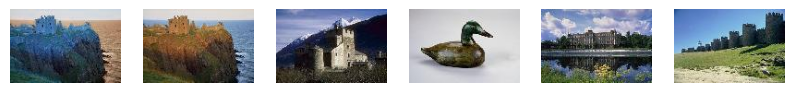

In [8]:
import cv2
import numpy as np
from skimage.feature import graycomatrix,graycoprops
import os
import matplotlib.pyplot as plt

def color_Moments(img):
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    l, h, c = np.shape(image)
    r = image[:, :, 0]
    g = image[:, :, 1]
    b = image[:, :, 2]
    mean_red = np.mean(r)
    mean_green = np.mean(g)
    mean_blue = np.mean(b)
    variance_red = np.var(r)
    variance_green = np.var(g)
    variance_blue = np.var(b)
    return [mean_red, mean_green, mean_blue, variance_red, variance_green, variance_blue]

def hsvHistogramFeatures(img, num_bins=8):
    image = cv2.imread(img)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h_hist = cv2.calcHist([hsv_image], [0], None, [num_bins], [0, 180])  # Hue histogram
    s_hist = cv2.calcHist([hsv_image], [1], None, [num_bins], [0, 256])  # Saturation histogram
    v_hist = cv2.calcHist([hsv_image], [2], None, [num_bins], [0, 256])  # Value histogram
    h_hist = cv2.normalize(h_hist, h_hist).flatten()
    s_hist = cv2.normalize(s_hist, s_hist).flatten()
    v_hist = cv2.normalize(v_hist, v_hist).flatten()
    return np.concatenate((h_hist, s_hist, v_hist))

def textureFeatures(img, distances=[1], angles=[0], levels=256):
    image = cv2.imread(img)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    glcm = graycomatrix(gray_image, distances, angles, symmetric=True, normed=True, levels=levels)
    contrast = graycoprops(glcm, 'contrast').flatten()
    correlation = graycoprops(glcm, 'correlation').flatten()
    energy = graycoprops(glcm, 'energy').flatten()
    homogeneity = graycoprops(glcm, 'homogeneity').flatten()
    return np.array([contrast[0], correlation[0], energy[0], homogeneity[0]])

def getFeatures(img):
    color_moments = color_Moments(img)
    histogram_features = hsvHistogramFeatures(img)
    texture_features = textureFeatures(img)
    return np.concatenate((color_moments, histogram_features, texture_features))

def CBIR_Indexation(Data_path):
    images = os.listdir(Data_path)
    l = len(images)
    Matrix_Moments = np.empty((l, 30 + 4 + 1), dtype=object)  # 30 for features + 4 for texture + 1 for image name
    i = 0
    for image in images:
        img = os.path.join(Data_path, image)
        moments = getFeatures(img)
        Matrix_Moments[i, 1:] = moments
        Matrix_Moments[i, 0] = image
        i += 1
    return Matrix_Moments

def CBIR_Recherche(Imreq, ind_Matrix, Data_path):
    req_features = getFeatures(Imreq)
    l, c = np.shape(ind_Matrix)
    features = ind_Matrix[:, 1:c]
    images = ind_Matrix[:, 0]
    distance_dic = {}

    for i in range(l):
        distance = np.linalg.norm(req_features - features[i, :])
        distance_dic[distance] = images[i]

    j = 2
    img_reqq = cv2.imread(Imreq)
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 6, 1)
    plt.imshow(img_reqq)
    plt.axis('off')
    sorted_distances = sorted(distance_dic.items())
    closest_images = sorted_distances[:5]

    for distance, img_name in closest_images:
        img_path = os.path.join(Data_path, img_name)
        img = cv2.imread(img_path)

        if img is not None:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(1, 6, j)
            plt.imshow(img_rgb)
            plt.axis('off')
            j += 1
    plt.show()

# Set paths
Data_path = "/content/drive/MyDrive/Colab Notebooks/lab6/obj_decoys-20241007T125454Z-001/obj_decoys"
req_path = "/content/drive/MyDrive/Colab Notebooks/lab6/img_requetes-20241007T125442Z-001/img_requetes/ImageRequete.jpg"

# Perform indexing and search
matrix = CBIR_Indexation(Data_path)
CBIR_Recherche(req_path, matrix, Data_path)


<h2>3.6	Robustesse vis-à-vis des transformations géométriques</h2>
La robustesse des systèmes CBIR est testée en présence des transformations géométriques ; à savoir la translation, la rotation et le changement d’échelle.
 Appliquer quelques transformations géométriques aux images requêtes et relancer la recherche. Interpréter les résultat de recherche.

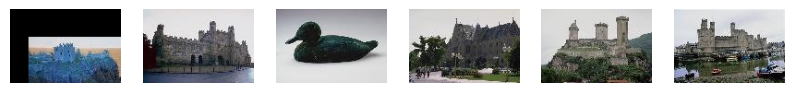

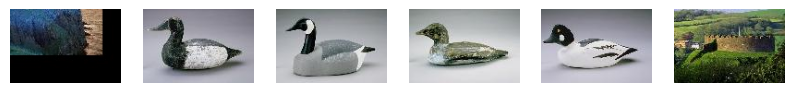

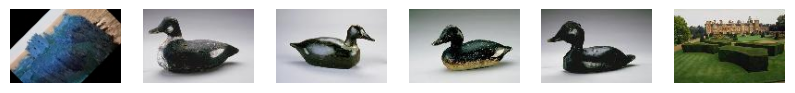

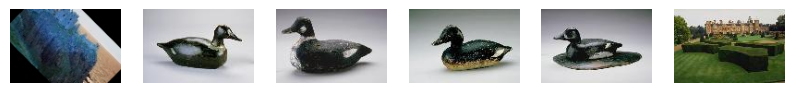

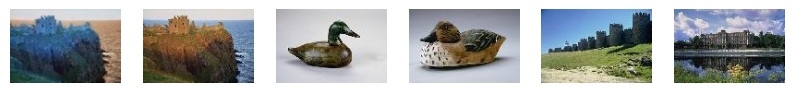

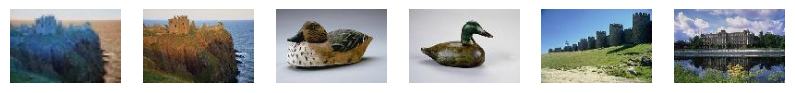

In [9]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def translate(image, tx, ty):
    # Create the translation matrix
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

def rotate(image, angle):
    # Get the center of the image for rotation
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)

    # Create the rotation matrix
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, M, (w, h))

def scale(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    return cv2.resize(image, (width, height))

def apply_transformations(req_image):
    # Load the original query image
    image = cv2.imread(req_image)
    transformed_images = []

    # Apply translations
    transformed_images.append(translate(image, 20, 30))  # Translate right and down
    transformed_images.append(translate(image, -20, -30))  # Translate left and up

    # Apply rotation
    transformed_images.append(rotate(image, 45))  # Rotate 45 degrees
    transformed_images.append(rotate(image, -45))  # Rotate -45 degrees

    # Apply scaling
    transformed_images.append(scale(image, 150))  # Scale up by 150%
    transformed_images.append(scale(image, 50))  # Scale down by 50%

    return transformed_images



# Set paths
req_path = "/content/drive/MyDrive/Colab Notebooks/lab6/img_requetes-20241007T125442Z-001/img_requetes/ImageRequete.jpg"

# Apply transformations
transformed_images = apply_transformations(req_path)

# Perform CBIR search for each transformed image
for transformed_img in transformed_images:
    # You can save transformed images temporarily or directly convert to a format suitable for the search
    temp_path = '/content/drive/MyDrive/Colab Notebooks/lab6'+'/temp_image.jpg'  # Temporary path for transformed image
    cv2.imwrite(temp_path, transformed_img)  # Save transformed image

    # Perform search
    CBIR_Recherche(temp_path, matrix, Data_path)  # Reuse your CBIR search function


On remarque que notre CBIR n'est pas robuste contre les transformations géometriques.